<a href="https://colab.research.google.com/github/Zac-Sells/MLA_ZTS/blob/main/MLA4_ZTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Machine Learning Assignment 4 #  
**Zachary Sells**

**CS-430-ON**

Machine Learning in the cloud

## Standard Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Imports for specific models
In this section, you will import the models from SKLearn that you will use this in this notebook. 

In [3]:
from sklearn import tree
from sklearn.tree import export_text

## Imports for Splitting Data and Building Pipeline


In [4]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Imports for Performance Measures

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error


## Confusion Matrix Function
This function is for creating a graphical version of the confusion matrix.



In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

The function below plots a straight line on a plot.

In [7]:
def abline(slope, intercept,color):
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', c=color)

## Problem 1

### Reading the Data

In [8]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/banknote_authentication.csv')

### Statistical and Visual Exploration

### Splitting Data into Train/Test

In [10]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'forgery'], dtype='object')

Create a data frame called X of your inputs that includes all columns except date and forgery.

In [11]:
X = (df[['variance','skewness','curtosis','entropy']])

Create a data frame called y of your output that includes only forgery This will be your target variable that you are trying to predict.


In [12]:
Y= (df[['forgery']])

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=4)

### Building the Pipeline

In [14]:
num_attribs=['variance','skewness','curtosis','entropy']

Create a column transformer that will MinMax scale the numerical variables 

In [15]:
col_transform=ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs)],remainder='passthrough')

Create a pipeline that will transform the data and then run the DecisionTreeClassification algorithm.

In [23]:

pipeline = Pipeline([('transform',col_transform),('decision_tree',tree.DecisionTreeClassifier(max_depth=5))])

### Executing the Model

Run the pipeline to fit the DecisionTreeClassification model.

In [24]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('transform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['variance', 'skewness',
                                                   'curtosis', 'entropy'])])),
                ('decision_tree', DecisionTreeClassifier(max_depth=5))])

### Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [25]:
y_pred= pipeline.predict(X_test)

Call the plot_cm function to generate the confusion matrix.

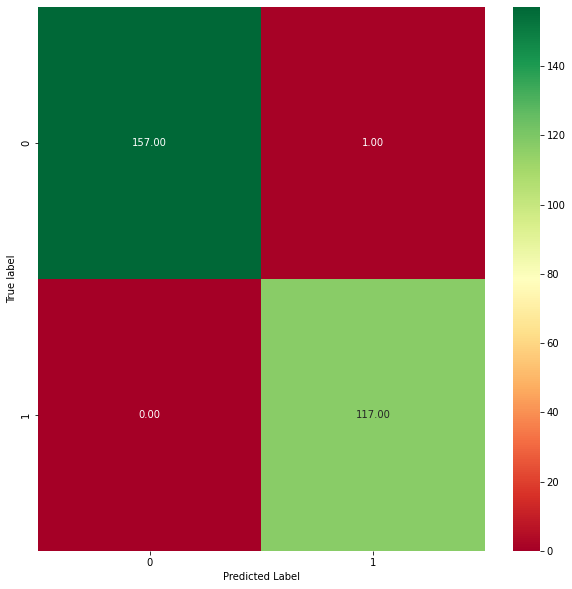

In [27]:
plot_cm(y_test,y_pred)

Calculate the precision, recall, and F1 score. In a markdown comment below your results, interpret your results.

In [30]:
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("F1 Score: ", f1_score(y_test,y_pred))

Precision:  0.9915254237288136
Recall:  1.0
F1 Score:  0.9957446808510638


*   The model correctly predicted the number of forgeries 99.15% of the time. (117/118)
*   The model correctly predicted all of the true positives based on a recall score of 1.
*   The model made a correct predictions 99.57% of the time based on the f1 score.


### Conclusion
Write a general conclusion about the results of your model.

In a Markdown comment, write a conclusion on how suitable you think this model is for predicting whether or not a banknote is a forgery.

Based on the results of the precision, recall and F1 scroes the model is almost perfect at predicting wether or not a banknote is a forgery or not. The model is more than sufficeient and is an acceptable model. 

## Problem 2

### Reading the Data

Load the Steel_industry_data.csv into a data frame named df.

In [31]:
df = pd.read_csv('/content/gdrive/MyDrive/CS430/Steel_industry_data.csv') 

Rename the columns according to Table 1: Columns Names.


In [32]:
df.rename(columns={'Usage_kWh':'usage_kwh'},inplace=True)
df.rename(columns={'Lagging_Current_Reactive.Power_kVarh':'lag_react_pwr_kvarh'},inplace=True)
df.rename(columns={'Leading_Current_Reactive_Power_kVarh':'lead_react_pwr_kvarh'},inplace=True)
df.rename(columns={'Lagging_Current_Power_Factor':'lag_current_pwr'},inplace=True)
df.rename(columns={'Leading_Current_Power_Factor':'lead_current_pwr'},inplace=True)
df.rename(columns={'NSM':'nsm'},inplace=True)
df.rename(columns={'WeekStatus':'week_status'},inplace=True)
df.rename(columns={'Day_of_week':'day_of_week'},inplace=True)
df.rename(columns={'Load_Type':'load_type'},inplace=True)

### Splitting Data into Train/Test

In [33]:
df.columns

Index(['date', 'usage_kwh', 'lag_react_pwr_kvarh', 'lead_react_pwr_kvarh',
       'CO2(tCO2)', 'lag_current_pwr', 'lead_current_pwr', 'nsm',
       'week_status', 'day_of_week', 'load_type'],
      dtype='object')

Create a data frame called X of your inputs that includes all columns except date and usage_kwh.

In [34]:
X = (df[['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm','week_status','day_of_week','load_type']])

Create a data frame called y of your output that includes only usage_kwh. This will be your target variable that you are trying to predict.


In [35]:
Y = (df['usage_kwh'])

Split the data into Train/Test sets.  Use 20% of the data for testing. You should have 4 data frames X_train, X_test, y_train,  and y_test.


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=.20, random_state=2)

### Building the Pipeline

In [37]:
num_attribs=['lag_react_pwr_kvarh','lead_react_pwr_kvarh','CO2(tCO2)','lag_current_pwr','lead_current_pwr','nsm',]
cat_attribs=['week_status','day_of_week','load_type']

Create a column transformer that will OneHotEncode the categorical variables and MinMax scale the numerical variables (not the output).


In [38]:
col_transform = ColumnTransformer(transformers=[('num',MinMaxScaler(),num_attribs),('cat',OneHotEncoder(),cat_attribs)],remainder='passthrough')

Create a pipeline that will transform the data and then run the DecisionTreeRegression algorithm.


In [40]:
pipeline=Pipeline([('trans',col_transform),('decision_tree_Reg',tree.DecisionTreeRegressor(max_depth=5))])

### Executing the Model

Run the pipeline to fit the DecisionTreeRegression.

In [42]:
pipeline.fit(X_train,np.ravel(y_train))

Pipeline(steps=[('trans',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', MinMaxScaler(),
                                                  ['lag_react_pwr_kvarh',
                                                   'lead_react_pwr_kvarh',
                                                   'CO2(tCO2)',
                                                   'lag_current_pwr',
                                                   'lead_current_pwr', 'nsm']),
                                                 ('cat', OneHotEncoder(),
                                                  ['week_status', 'day_of_week',
                                                   'load_type'])])),
                ('decision_tree_Reg', DecisionTreeRegressor(max_depth=5))])

### Evaluating Model

Run the pipeline to predict y values from the test data set and save them in a variable called y_pred.

In [43]:
y_pred= pipeline.predict(X_test)

In [44]:
y_pred

array([63.13980809,  3.45692578,  3.45692578, ...,  3.45692578,
        3.45692578,  3.45692578])

In [45]:
print(mean_squared_error(y_test, y_pred)**(.5))

3.6173467316462142


In [ ]:
print(mean_squared_error(y_test, y_pred)**(.5))

In [51]:
y_pred1=pipeline.predict(X_train)

In [52]:
print(mean_squared_error(y_pred1, y_train)**(.5))

3.5243403900808032


### Conclusion
Write a general conclusion about the results of your model.

The mean squared error for the test is 3.62 and the mean squared error of the train is 3.52. Both of these scores are reasonably close to 0 which is a perfect score. Meaning this model is not perfect but it is usable. 